In [1]:
#Note: we denote L2 for euclidian norm and l2 for function norm (we switched the standard nomenclature)
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Generation plots of Thesis Document

In [79]:
%matplotlib inline
import pandas as pd
from plot_graphs import plot_weight_estim_loss_thesis

simu_file_cleaned = "/Users/mehdi/Downloads/GLU_valid_2017-06-12_18.37.51/cleaned_results_N_100_500_1000_GLU_2017-06-12_18.37.51.csv"
df_cleaned = pd.read_csv(simu_file_cleaned)


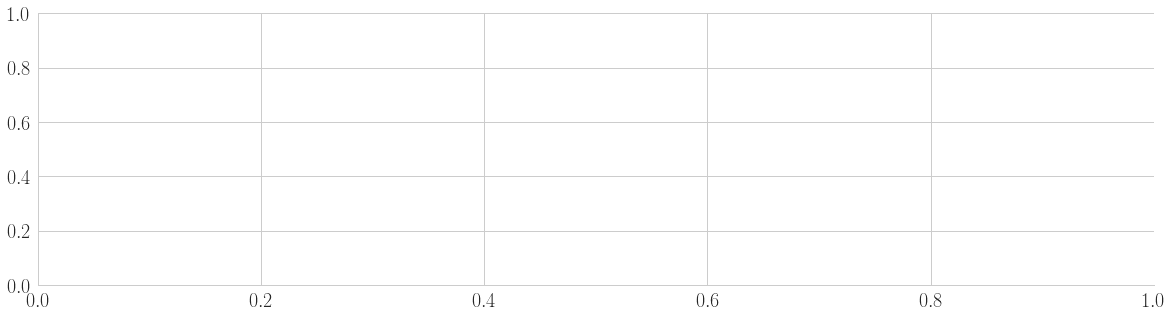

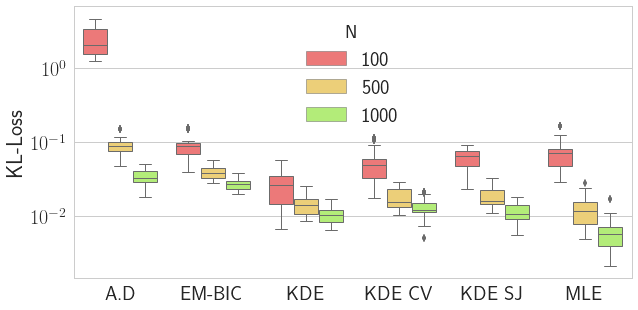

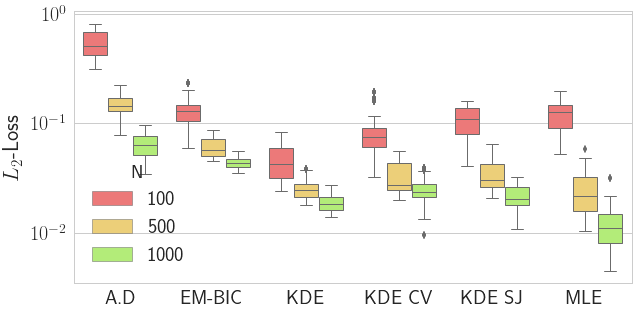

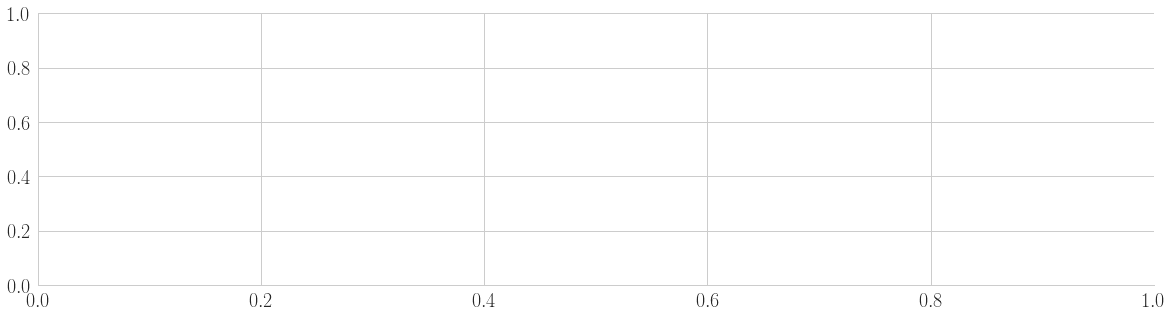

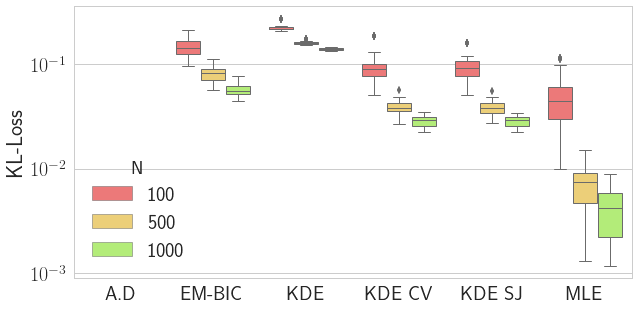

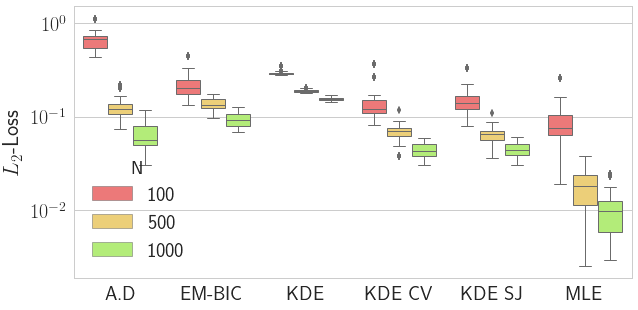

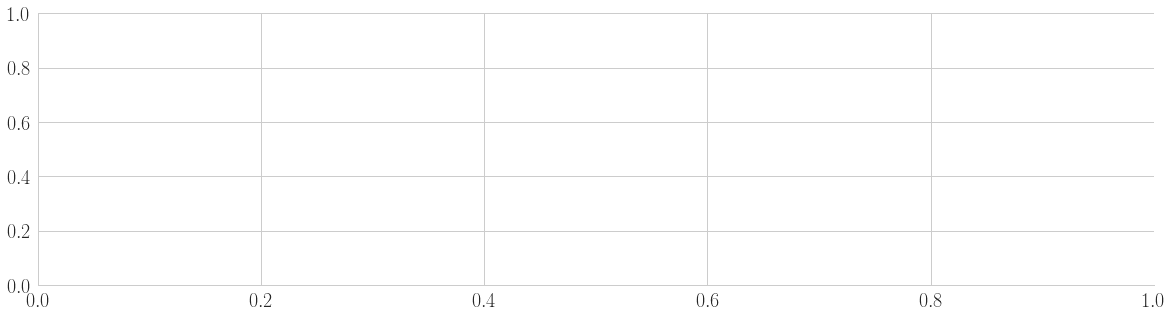

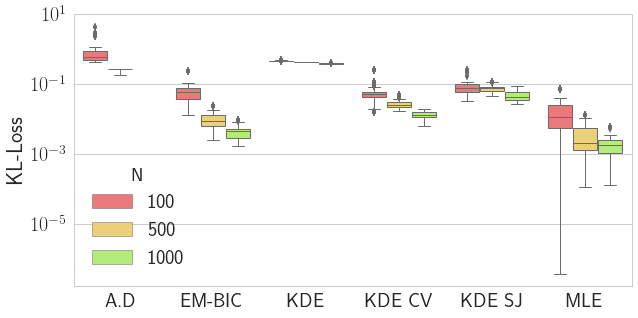

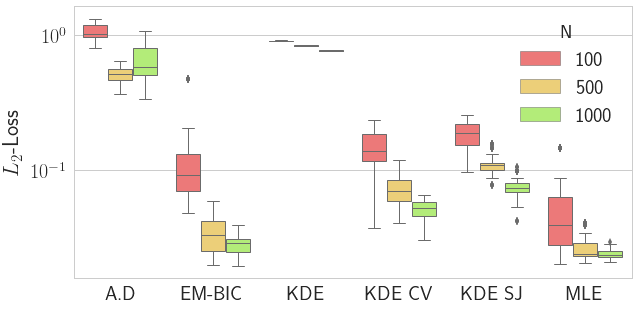

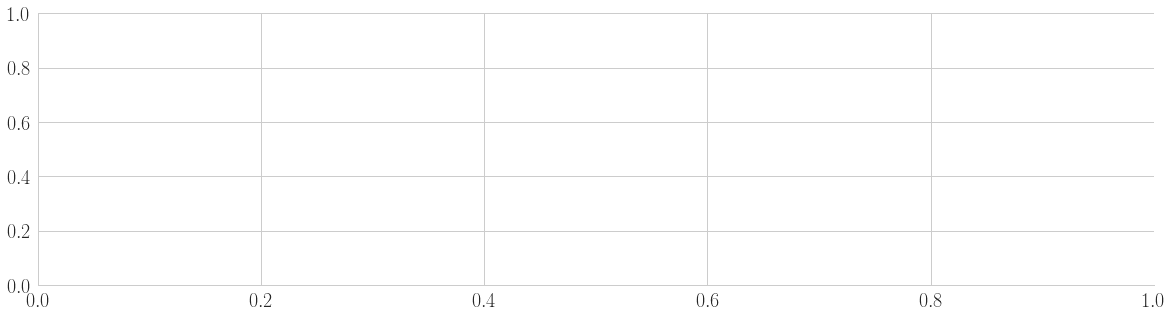

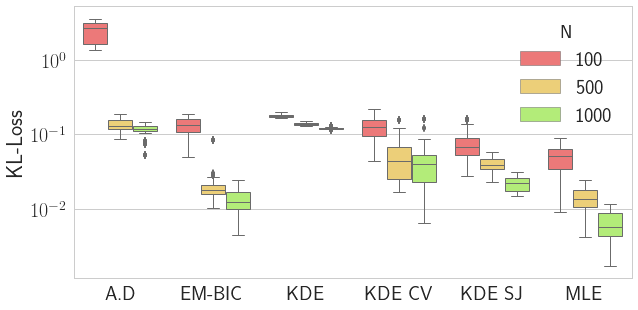

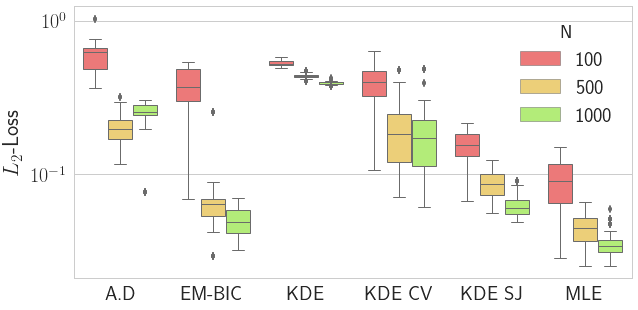

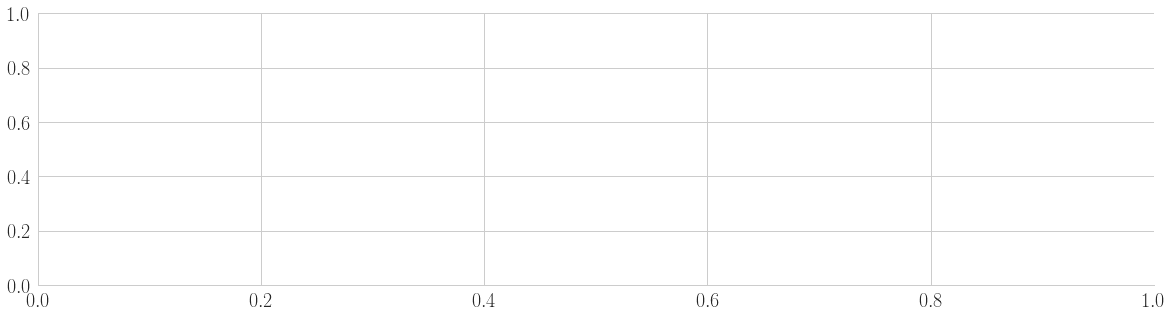

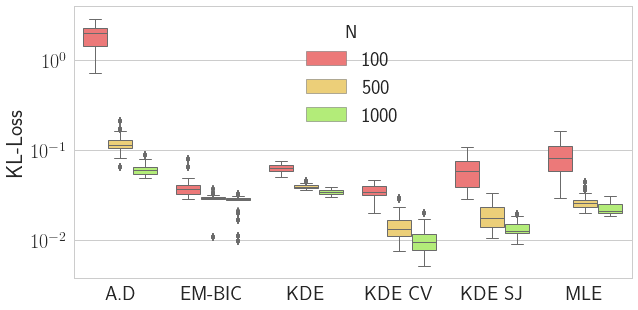

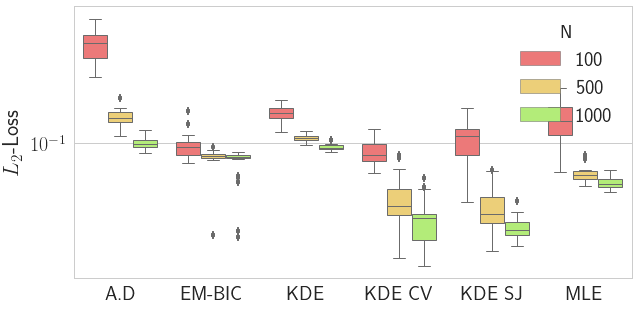

In [80]:
plot_weight_estim_loss_thesis(df_cleaned, "GLU")

# Time graphs

In [9]:
import pandas as pd
file_simu = "full_results_N_100_500_1000_GLU_2017-06-12_18.37.51.csv"
simu_file_folder = "/Users/mehdi/Downloads/GLU_valid_2017-06-12_18.37.51/"
df_full = pd.read_csv(simu_file_folder+file_simu)

In [10]:
df_full = df_full.drop(["Unnamed: 0"], axis=1)

In [28]:
from cv_kde_add import retrieve_type

In [52]:
selected_time_col = ["N"]+[c for c in df_full.columns if "time" in c]
df6 = df_full[selected_time_col]
df7 = pd.melt(df6, id_vars=["N"], var_name="Type", value_name="Time")
df_times = pd.concat([df7, df7.apply(retrieve_type, axis=1)], axis=1)


In [55]:
df_times.to_csv(simu_file_folder+"times.csv")

In [59]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

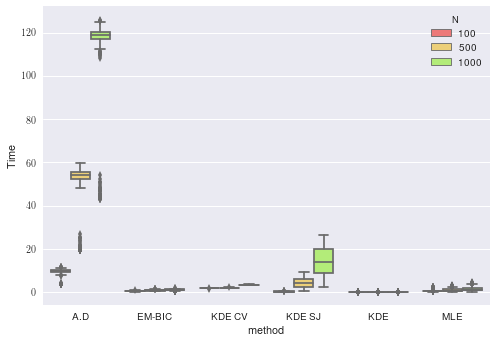

In [54]:
boxplot = sns.boxplot(x="method", y="Time", hue="N", data=df_times,
                         palette=["#ff6666", "#ffd966", "#b3ff66"])

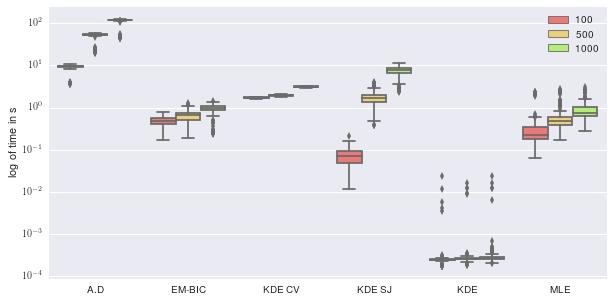

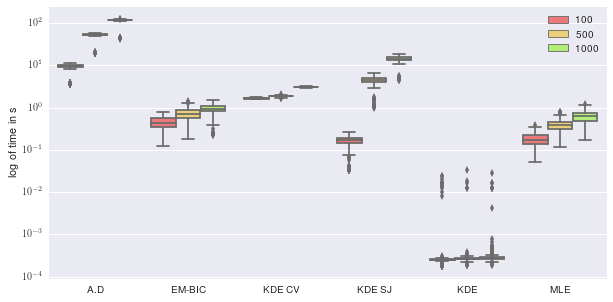

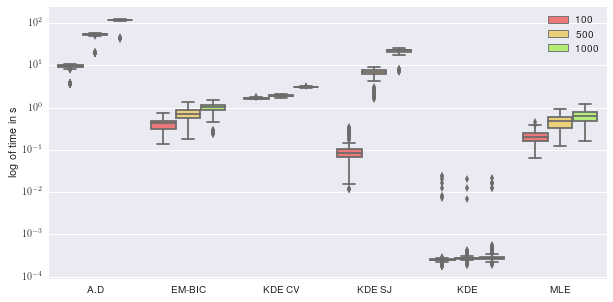

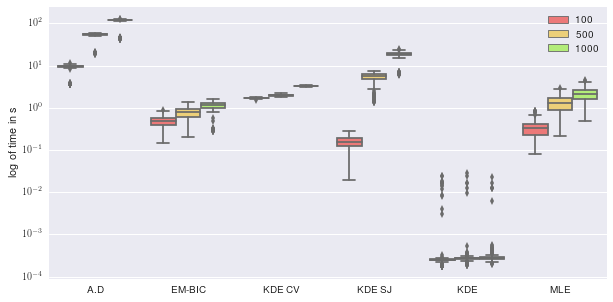

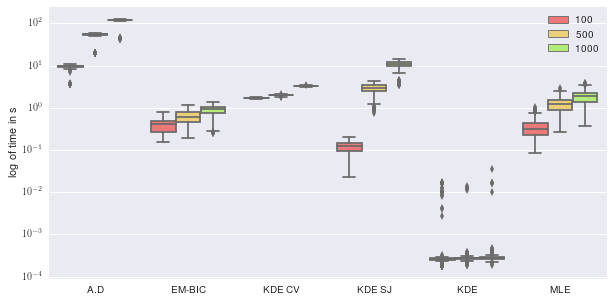

In [60]:
for type_dens in ["uniform", "rect", "gauss", "lapl_gauss", "lapl_gauss_not_dict"]:
    plt.figure(figsize=(10,5))
    df_temp = df_times[df_times["type_dens"]==type_dens]
    boxplot = sns.boxplot(x="method", y="Time", hue="N", data=df_temp,
                         palette=["#ff6666", "#ffd966", "#b3ff66"])
    for patch in boxplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    boxplot.set_xlabel('')
    boxplot.set_ylabel("log of time in s")
    sns_plot = boxplot.get_figure()
    for ax in sns_plot.get_axes():
        ax.set_yscale('log')
        ax.legend(bbox_to_anchor=(0, 0))
    plt.legend()
    sns_plot = boxplot.get_figure()
    sns_plot.savefig("../../phd-thesis/TeX_files/res_temp"+type_dens+"_times", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)
    


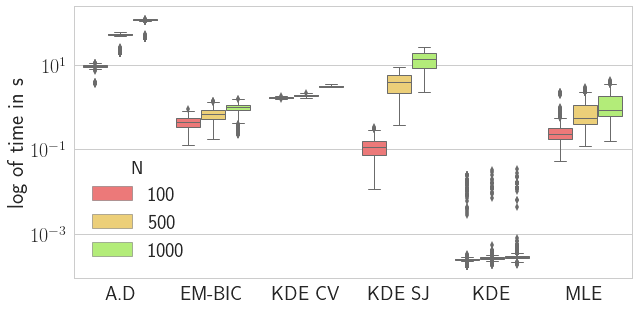

In [67]:
#merge all types of densities
plt.figure(figsize=(10,5))
boxplot = sns.boxplot(x="method", y="Time", hue="N", data=df_times,
                     palette=["#ff6666", "#ffd966", "#b3ff66"])
for patch in boxplot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
boxplot.set_xlabel('')
boxplot.set_ylabel("log of time in s")
sns_plot = boxplot.get_figure()
for ax in sns_plot.get_axes():
    ax.set_yscale('log')
sns_plot = boxplot.get_figure()
sns_plot.savefig("../../phd-thesis/TeX_files/res_times", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

